字体设置: 成功加载字体 'SimHei' from /Users/annfengdeye/Library/Fonts/SimHei.ttf

--- 1. 加载和预处理数据 (利润表.csv) ---
--- 成功从 利润表.csv 加载数据 ---
转换数值列...
--- 数据预处理完成 ---
数据总维度 (预处理后): (910, 21)


==================== 分析目标变量: 净利润 ====================
用于 '净利润' 分析的数据维度 (移除目标NaN后): (910, 21)

--- 2. 目标变量 '净利润' 分布分析 ---

'净利润' 的描述性统计:
count    9.100000e+02
mean     5.910552e+08
std      2.163588e+09
min     -5.973399e+09
25%      2.768233e+07
50%      1.066401e+08
75%      3.371162e+08
max      2.835026e+10
Name: 净利润, dtype: float64


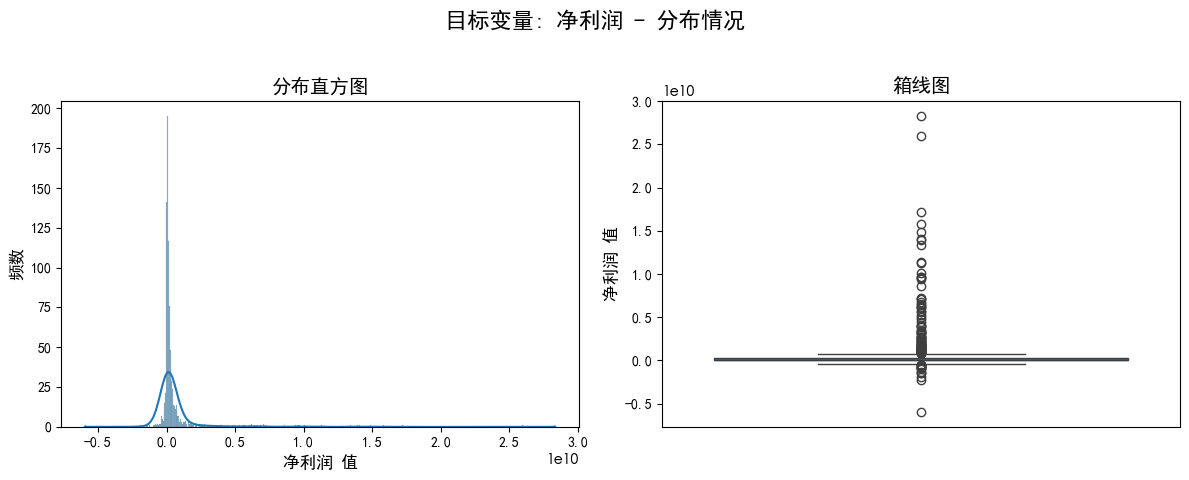


--- 3. 特征选择 (与 '净利润' 的皮尔逊相关性) ---

与 '净利润' 相关系数绝对值 > 0.6 的特征:
利润总额                0.998086
营业利润                0.995820
综合收益总额              0.990767
归属于母公司所有者的净利润       0.989514
归属于母公司普通股东综合收益总额    0.977445
所得税                 0.965168
税金及附加               0.843777
管理费用                0.769011
营业收入                0.753896
营业总收入               0.753838
营业总成本               0.731153
营业成本                0.711726
投资收益                0.635837
Name: 净利润, dtype: float64

初步选定的特征 (13个): ['营业总收入', '营业收入', '营业总成本', '营业成本', '税金及附加', '管理费用', '投资收益', '营业利润', '利润总额', '所得税', '归属于母公司所有者的净利润', '综合收益总额', '归属于母公司普通股东综合收益总额']

--- 4. 处理多重共线性 ---


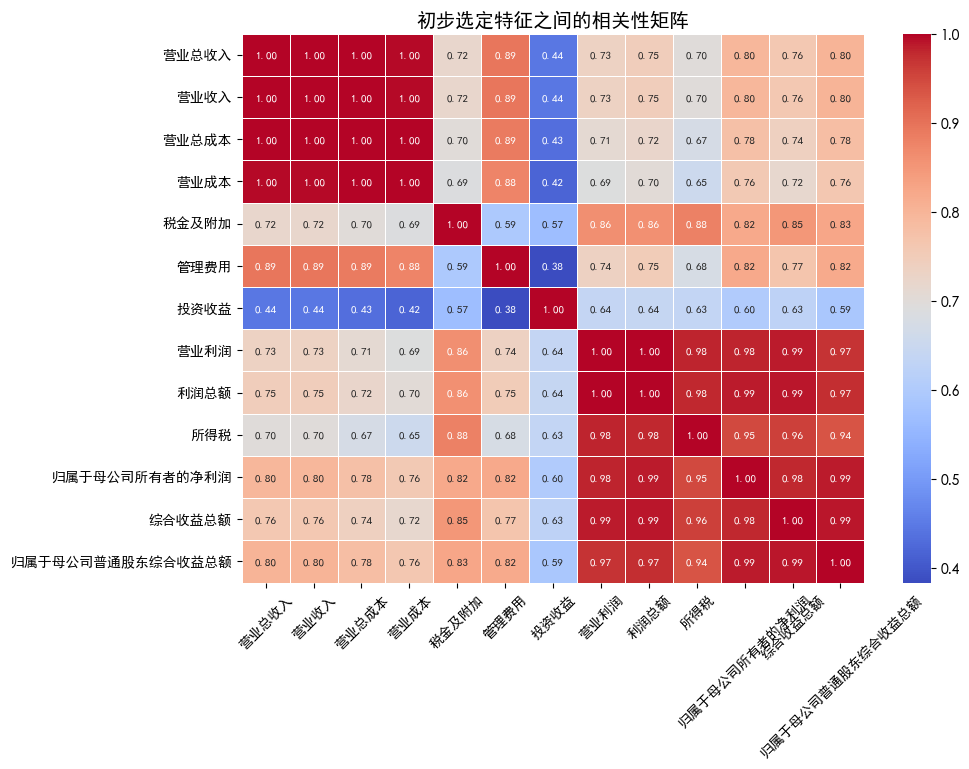

  - 标记移除 '营业总收入' (与 '营业收入' 相关性 > 0.8, 且 '营业总收入' 与目标 '净利润' 相关性较低或相等)
  - 标记移除 '营业总成本' (与 '营业收入' 相关性 > 0.8, 且 '营业总成本' 与目标 '净利润' 相关性较低)
  - 标记移除 '营业成本' (与 '营业收入' 相关性 > 0.8, 且 '营业成本' 与目标 '净利润' 相关性较低)
  - 标记移除 '营业收入' (与 '管理费用' 相关性 > 0.8, 且 '营业收入' 与目标 '净利润' 相关性较低或相等)
  - 标记移除 '税金及附加' (与 '营业利润' 相关性 > 0.8, 且 '税金及附加' 与目标 '净利润' 相关性较低或相等)
  - 标记移除 '营业利润' (与 '利润总额' 相关性 > 0.8, 且 '营业利润' 与目标 '净利润' 相关性较低或相等)
  - 标记移除 '所得税' (与 '利润总额' 相关性 > 0.8, 且 '所得税' 与目标 '净利润' 相关性较低)
  - 标记移除 '管理费用' (与 '归属于母公司所有者的净利润' 相关性 > 0.8, 且 '管理费用' 与目标 '净利润' 相关性较低或相等)
  - 标记移除 '归属于母公司所有者的净利润' (与 '利润总额' 相关性 > 0.8, 且 '归属于母公司所有者的净利润' 与目标 '净利润' 相关性较低)
  - 标记移除 '综合收益总额' (与 '利润总额' 相关性 > 0.8, 且 '综合收益总额' 与目标 '净利润' 相关性较低)
  - 标记移除 '归属于母公司普通股东综合收益总额' (与 '利润总额' 相关性 > 0.8, 且 '归属于母公司普通股东综合收益总额' 与目标 '净利润' 相关性较低)

因多重共线性为目标 '净利润' 移除的特征: ['归属于母公司所有者的净利润', '税金及附加', '营业收入', '营业成本', '营业总成本', '所得税', '管理费用', '归属于母公司普通股东综合收益总额', '综合收益总额', '营业总收入', '营业利润']

最终选定的特征 (2个) for '净利润': ['投资收益', '利润总额']

--- 5. 特征有效性评估 (SHAP for 净利润) ---

注意：将在当前可用数据上训练模型并

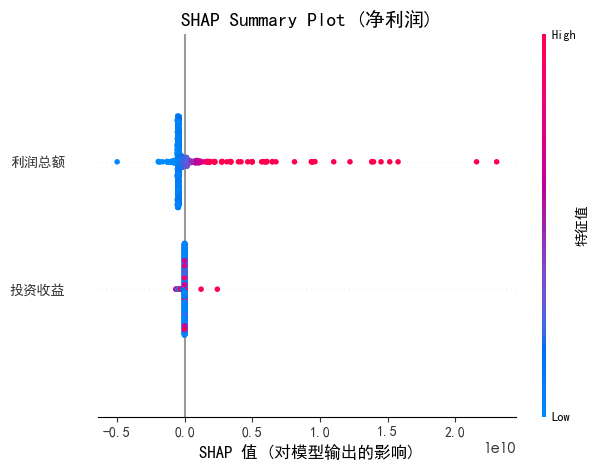


正在生成特征 '利润总额' 的 SHAP Dependence Plot...


<Figure size 640x480 with 0 Axes>

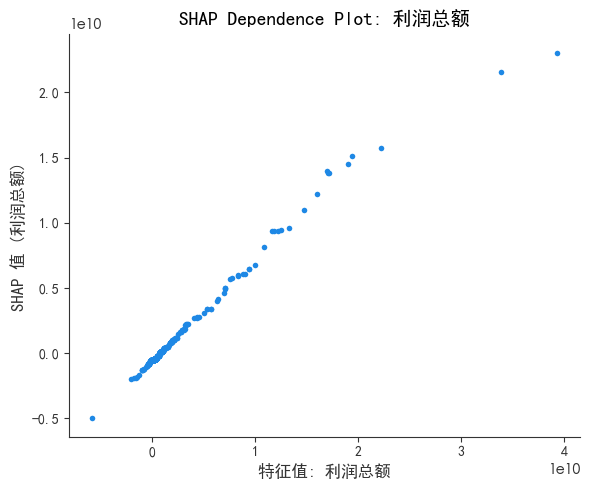



--- 所有目标变量分析完成 ---


In [14]:
# 利润表

# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer 
import shap
import warnings
import traceback 

# --- Configuration ---
FILE_PATH = "利润表.csv"
TARGET_VARIABLES = ['净利润'] 

# --- Font Configuration ---
FONT_PATH = '/Users/annfengdeye/Library/Fonts/SimHei.ttf' # User specified path
# FONT_PATH = '/System/Library/Fonts/STHeiti Medium.ttc' # macOS Heiti
# FONT_PATH = 'C:/Windows/Fonts/simhei.ttf' # Windows SimHei

# Thresholds
PEARSON_THRESHOLD = 0.6
MULTICOLLINEARITY_THRESHOLD = 0.8

# Font properties sizes
font_label_size = 12
font_title_size = 14
font_tick_size = 10
font_legend_size = 10
font_annot_size = 8

# --- Warnings Configuration ---
warnings.filterwarnings("ignore", message="FixedFormatter should only be used together with FixedLocator")
warnings.filterwarnings("ignore", message="Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.")
warnings.filterwarnings("ignore", category=UserWarning, module='shap')
warnings.filterwarnings("ignore", category=FutureWarning) # Ignore future warnings

# --- Font Setup ---
my_font_prop = None
try:
    if FONT_PATH and os.path.exists(FONT_PATH):
        my_font_prop = fm.FontProperties(fname=FONT_PATH)
        font_name = my_font_prop.get_name()
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
        plt.rcParams['axes.unicode_minus'] = False
        print(f"字体设置: 成功加载字体 '{font_name}' from {FONT_PATH}")
    else:
        # Fallback to common Chinese fonts if specific path fails or not provided
        common_fonts = ['SimHei', 'Microsoft YaHei', 'PingFang SC', 'STHeiti', 'Heiti TC', 'sans-serif'] # Added sans-serif as last resort
        found_font = None
        for font in common_fonts:
             try:
                 # Check if font is findable by Matplotlib
                 fm.findfont(font, fallback_to_default=False)
                 found_font = font
                 break
             except:
                 continue # Font not found, try next

        if found_font:
            plt.rcParams['font.family'] = 'sans-serif' # Base family
            plt.rcParams['font.sans-serif'] = [found_font] + plt.rcParams['font.sans-serif'] # Prepend found font
            plt.rcParams['axes.unicode_minus'] = False
            my_font_prop = fm.FontProperties(family=found_font) # Create FontProperties from family name
            print(f"字体设置: 自动找到并设置字体 '{found_font}'")
        else:
            if FONT_PATH:
                print(f"警告: 指定的字体文件未找到: {FONT_PATH} 且未能自动找到常用中文字体。")
            else:
                print(f"警告: 未指定字体路径 (FONT_PATH) 且未能自动找到常用中文字体。")
            print("将使用 Matplotlib 默认字体，中文可能显示为方块。")
            plt.rcParams['axes.unicode_minus'] = False
            my_font_prop = fm.FontProperties() # Use default properties

except Exception as e:
    print(f"字体设置时出错: {e}")
    print("将使用 Matplotlib 默认字体。")
    plt.rcParams['axes.unicode_minus'] = False
    my_font_prop = fm.FontProperties() # Use default

# --- 1. 数据加载与预处理 ---
print(f"\n--- 1. 加载和预处理数据 ({FILE_PATH}) ---")
try:
    try:
        df = pd.read_csv(FILE_PATH, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(FILE_PATH, encoding='gbk')
    print(f"--- 成功从 {FILE_PATH} 加载数据 ---")
except FileNotFoundError:
    print(f"错误：文件 '{FILE_PATH}' 未找到。请确保文件在此脚本的同一目录或提供完整路径。")
    exit()
except Exception as e:
    print(f"读取文件 '{FILE_PATH}' 时发生错误: {e}")
    exit()

# # Drop specified columns if needed (example)
# if 'COLUMNS_TO_DROP' in globals() and COLUMNS_TO_DROP:
#     print(f"删除列: {COLUMNS_TO_DROP}")
#     df = df.drop(columns=COLUMNS_TO_DROP, errors='ignore')

# Convert '统计日期' to datetime
df['统计日期'] = pd.to_datetime(df['统计日期'], errors='coerce')

# Convert potential numeric columns to numeric, coercing errors
print("转换数值列...")
all_columns = df.columns
numeric_cols_potential = [col for col in all_columns if col not in ['股票代码', '统计日期']]
for col in numeric_cols_potential:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for NaNs introduced during conversion or originally present
nan_check = df.isnull().sum()
if nan_check.sum() > 0:
    print("\n警告：数据中存在缺失值 (NaN)。将在每个目标变量分析和模型训练前处理。")
    # print(nan_check[nan_check > 0]) # Optionally print columns with NaNs

print("--- 数据预处理完成 ---")
print(f"数据总维度 (预处理后): {df.shape}")
if df.empty:
    print("错误：预处理后数据为空。")
    exit()

# --- Loop through each target variable for analysis ---
for target_variable in TARGET_VARIABLES:
    print(f"\n\n{'='*20} 分析目标变量: {target_variable} {'='*20}")

    if target_variable not in df.columns:
        print(f"错误: 目标变量 '{target_variable}' 不在数据框中。跳过此目标变量。")
        continue

    # Create a copy for this target's analysis and drop rows where THIS target is NaN
    df_target = df.dropna(subset=[target_variable]).copy()
    if df_target.empty:
        print(f"警告: 移除 '{target_variable}' 的缺失值后数据为空。跳过此目标变量。")
        continue
    print(f"用于 '{target_variable}' 分析的数据维度 (移除目标NaN后): {df_target.shape}")


    # --- 2. 目标变量分析 ({target_variable} 分布) ---
    print(f"\n--- 2. 目标变量 '{target_variable}' 分布分析 ---")
    print(f"\n'{target_variable}' 的描述性统计:")
    print(df_target[target_variable].describe())

    fig_dist, axes_dist = plt.subplots(1, 2, figsize=(12, 5))
    fig_dist.suptitle(f"目标变量: {target_variable} - 分布情况", fontproperties=my_font_prop, size=font_title_size + 2)

    # Histogram
    sns.histplot(df_target[target_variable], kde=True, ax=axes_dist[0])
    axes_dist[0].set_title('分布直方图', fontproperties=my_font_prop, size=font_title_size)
    axes_dist[0].set_xlabel(f"{target_variable} 值", fontproperties=my_font_prop, size=font_label_size)
    axes_dist[0].set_ylabel("频数", fontproperties=my_font_prop, size=font_label_size)
    for label in axes_dist[0].get_xticklabels() + axes_dist[0].get_yticklabels():
        label.set_fontproperties(my_font_prop)
        label.set_size(font_tick_size)

    # Boxplot
    sns.boxplot(y=df_target[target_variable], ax=axes_dist[1])
    axes_dist[1].set_title('箱线图', fontproperties=my_font_prop, size=font_title_size)
    axes_dist[1].set_ylabel(f"{target_variable} 值", fontproperties=my_font_prop, size=font_label_size)
    axes_dist[1].set_xlabel("")
    for label in axes_dist[1].get_yticklabels():
        label.set_fontproperties(my_font_prop)
        label.set_size(font_tick_size)
    axes_dist[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()
    # Removed SMOTE comment as it's implicitly handled by using regression


    # --- 3. 特征选择 (Pearson Correlation) ---
    print(f"\n--- 3. 特征选择 (与 '{target_variable}' 的皮尔逊相关性) ---")
    # Identify potential features for *this* target analysis
    numeric_cols = df_target.select_dtypes(include=np.number).columns.tolist()
    # Exclude ALL target variables defined in TARGET_VARIABLES and non-numeric IDs
    potential_features = [col for col in numeric_cols if col not in TARGET_VARIABLES + ['股票代码']]
    # Ensure features actually exist in the current df_target and are numeric
    valid_features = [f for f in potential_features if f in df_target.columns and pd.api.types.is_numeric_dtype(df_target[f])]

    if not valid_features:
        print("错误：在此数据子集中没有有效的数值特征列可用于相关性分析。")
        final_selected_features = [] # Initialize for this target
    else:
        # Calculate correlations only with valid features and the current target
        # Need to handle potential NaNs in features before calculating correlation
        cols_for_corr = valid_features + [target_variable]
        corr_df = df_target[cols_for_corr].copy()
        # Optional: Impute NaNs only for correlation calculation if desired, or rely on pair-wise nature of .corr()
        # Example: corr_df.fillna(corr_df.median(), inplace=True)
        correlations = corr_df.corr(method='pearson')[target_variable].drop(target_variable, errors='ignore').dropna()

        highly_correlated_features = correlations[abs(correlations) > PEARSON_THRESHOLD]
        print(f"\n与 '{target_variable}' 相关系数绝对值 > {PEARSON_THRESHOLD} 的特征:")
        if highly_correlated_features.empty:
            print("未找到符合条件的特征。")
            selected_features_stage1 = []
        else:
            # Sort by absolute correlation value, descending
            print(highly_correlated_features.abs().sort_values(ascending=False))
            selected_features_stage1 = highly_correlated_features.index.tolist()
        print(f"\n初步选定的特征 ({len(selected_features_stage1)}个): {selected_features_stage1}")

        # Proceed only if stage 1 features were found
        if not selected_features_stage1:
            print(f"\n警告：未找到与 '{target_variable}' 相关性足够高的特征。")
            final_selected_features = [] # Set final features to empty for this target
        else:
            # --- 4. 处理多重共线性 ---
            print("\n--- 4. 处理多重共线性 ---")
            if len(selected_features_stage1) > 1:
                # Ensure features are still in df_target columns (should be, but good practice)
                selected_features_stage1 = [f for f in selected_features_stage1 if f in df_target.columns]
                if len(selected_features_stage1) <= 1:
                    print("\n经过检查，只剩一个或零个初步选定特征，无需处理多重共线性。")
                    final_selected_features = selected_features_stage1
                else:
                    # Calculate correlation matrix ONLY for the selected features on df_target
                    correlation_matrix_selected = df_target[selected_features_stage1].corr(method='pearson').abs()

                    # Plot heatmap
                    fig_heatmap, ax_heatmap = plt.subplots(figsize=(max(8, len(selected_features_stage1)*0.8), max(6, len(selected_features_stage1)*0.6)))
                    sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f",
                                linewidths=.5, ax=ax_heatmap, annot_kws={"size": font_annot_size})
                    ax_heatmap.set_title('初步选定特征之间的相关性矩阵', fontproperties=my_font_prop, size=font_title_size)
                    ax_heatmap.tick_params(axis='x', rotation=45)
                    ax_heatmap.tick_params(axis='y', rotation=0)
                    for label in ax_heatmap.get_xticklabels() + ax_heatmap.get_yticklabels():
                        label.set_fontproperties(my_font_prop)
                        label.set_size(font_tick_size)
                    # Attempt to set font for annotations (might not always work depending on backend)
                    try:
                        for text in ax_heatmap.texts:
                            # May need to adjust size slightly if using FontProperties directly
                            text.set_fontproperties(my_font_prop)
                            text.set_size(font_annot_size) # Ensure size consistency
                    except Exception as e_annot:
                        print(f"注: 未能直接为热力图注释设置字体 ({e_annot}).")

                    plt.tight_layout()
                    plt.show()

                    # Remove collinear features logic (based on correlation with CURRENT target)
                    features_to_remove = set()
                    for i in range(len(correlation_matrix_selected.columns)):
                        for j in range(i):
                            feature_i = correlation_matrix_selected.columns[i]
                            feature_j = correlation_matrix_selected.columns[j]
                            # Check if either feature is already marked for removal
                            if feature_i in features_to_remove or feature_j in features_to_remove:
                                continue
                            # Check for high correlation between features
                            if correlation_matrix_selected.iloc[i, j] > MULTICOLLINEARITY_THRESHOLD:
                                # Get absolute correlation OF EACH FEATURE with the CURRENT target
                                corr_i_target = abs(correlations.get(feature_i, 0)) # Use correlations calculated earlier
                                corr_j_target = abs(correlations.get(feature_j, 0))
                                # Decide which feature to remove (the one less correlated with the target)
                                if corr_i_target < corr_j_target:
                                    features_to_remove.add(feature_i)
                                    print(f"  - 标记移除 '{feature_i}' (与 '{feature_j}' 相关性 > {MULTICOLLINEARITY_THRESHOLD}, 且 '{feature_i}' 与目标 '{target_variable}' 相关性较低)")
                                else: # If correlations are equal or i >= j, remove j (or i, choice is often arbitrary but consistent)
                                    features_to_remove.add(feature_j)
                                    print(f"  - 标记移除 '{feature_j}' (与 '{feature_i}' 相关性 > {MULTICOLLINEARITY_THRESHOLD}, 且 '{feature_j}' 与目标 '{target_variable}' 相关性较低或相等)")


                    final_selected_features = [f for f in selected_features_stage1 if f not in features_to_remove]
                    if features_to_remove:
                        print(f"\n因多重共线性为目标 '{target_variable}' 移除的特征: {list(features_to_remove)}")
                    else:
                        print("\n未发现需要因多重共线性移除的特征。")
                    print(f"\n最终选定的特征 ({len(final_selected_features)}个) for '{target_variable}': {final_selected_features}")

            elif len(selected_features_stage1) == 1:
                final_selected_features = selected_features_stage1
                print("\n只有一个初步选定的特征，无需处理多重共线性。")
                print(f"\n最终选定的特征 ({len(final_selected_features)}个) for '{target_variable}': {final_selected_features}")
            else: # Should not happen based on previous check, but for completeness
                 final_selected_features = []
                 print("\n没有初步选定的特征。")


    # --- 5. 特征有效性评估 (SHAP) ---
    print(f"\n--- 5. 特征有效性评估 (SHAP for {target_variable}) ---")

    if 'final_selected_features' in locals() and final_selected_features: # Check if variable exists and is not empty
        # Ensure selected features still exist in the target-specific dataframe columns
        final_selected_features = [f for f in final_selected_features if f in df_target.columns]

        if not final_selected_features:
            print(f"\n错误：没有最终有效的特征可用于 '{target_variable}' 的SHAP分析。")
        elif target_variable not in df_target.columns:
             print(f"\n错误：目标变量 '{target_variable}' 不在当前数据帧 df_target 中 (这不应该发生)。")
        else:
            X = df_target[final_selected_features].copy()
            y = df_target[target_variable].copy()

            if X.empty or y.empty or X.shape[0] < 2:
                print("\n警告：用于训练的数据不足（行数<2 或 无有效特征）。无法进行SHAP分析。")
            else:
                print("\n注意：将在当前可用数据上训练模型并计算SHAP值。")
                try:
                    # Handle NaN/inf in final X JUST before training using SimpleImputer
                    if X.isnull().values.any() or np.isinf(X.values).any():
                        print("\n警告：最终特征数据(X)中存在NaN或无穷大值，使用中位数填充...")
                        # Replace Inf with NaN first, as imputer might handle them differently
                        X.replace([np.inf, -np.inf], np.nan, inplace=True)
                        # Use SimpleImputer for median imputation
                        imputer = SimpleImputer(strategy='median')
                        X_imputed = imputer.fit_transform(X)
                        # Convert back to DataFrame to retain column names and index
                        X = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)
                        print("填充完成。")


                    # Final check for NaNs/Infs in X and y before training
                    if y.isnull().values.any() or np.isinf(y.values).any():
                        print(f"\n错误：目标变量(y: {target_variable})中存在NaN或无穷大值，无法训练模型。")
                    elif X.isnull().values.any():
                         print("\n错误：尝试填充X后仍存在NaN，无法训练模型。检查填充逻辑。")
                    else:
                        # Train Model
                        model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5, min_samples_leaf=1)
                        print(f"开始为 '{target_variable}' 训练随机森林模型...")
                        model.fit(X, y)
                        print("模型训练完成。")

                        # Explain Model using SHAP
                        print("正在计算 SHAP 值...")
                        explainer = shap.TreeExplainer(model)
                        shap_values = explainer.shap_values(X)
                        feature_names_for_plot = X.columns.tolist()
                        print("SHAP 值计算完成。")

                        print("\n正在生成 SHAP Summary Plot...")
                        plt.figure() # Create a new figure for SHAP plot
                        # Generate plot but don't show immediately to allow customization
                        shap.summary_plot(shap_values, X, feature_names=feature_names_for_plot, show=False, plot_size=None)

                        # Customize plot with font properties (Post-hoc modification)
                        try:
                            ax_shap_summary = plt.gcf().get_axes()[0] # Main plot axes
                            cbar_ax = plt.gcf().get_axes()[1] if len(plt.gcf().get_axes()) > 1 else None # Color bar axes, if exists

                            ax_shap_summary.set_title(f'SHAP Summary Plot ({target_variable})', fontproperties=my_font_prop, size=font_title_size)
                            ax_shap_summary.set_xlabel("SHAP 值 (对模型输出的影响)", fontproperties=my_font_prop, size=font_label_size)

                            # Set font for y-tick labels (feature names)
                            for label in ax_shap_summary.get_yticklabels():
                                label.set_fontproperties(my_font_prop)
                                label.set_size(font_tick_size)
                            # Set font for x-tick labels
                            for label in ax_shap_summary.get_xticklabels():
                                label.set_fontproperties(my_font_prop)
                                label.set_size(font_tick_size)

                            # Customize color bar if it exists
                            if cbar_ax and hasattr(cbar_ax, 'set_ylabel'):
                                cbar_ax.set_ylabel("特征值", fontproperties=my_font_prop, size=font_tick_size)
                                for label in cbar_ax.get_yticklabels():
                                    label.set_fontproperties(my_font_prop)
                                    label.set_size(font_tick_size - 1) # Slightly smaller for colorbar ticks often looks better
                        except IndexError:
                             print("警告：无法获取SHAP图的轴对象进行字体自定义。")
                        except Exception as e_cust:
                            print(f"警告：自定义SHAP Summary Plot字体时出错: {e_cust}")


                        plt.tight_layout()
                        plt.show()


                        # Generate Dependence Plot for the first feature (often most important)
                        if len(feature_names_for_plot) > 0:
                            # Choose the feature with the highest mean absolute SHAP value for dependence plot
                            mean_abs_shap = np.abs(shap_values).mean(axis=0)
                            feature_to_plot_index = np.argmax(mean_abs_shap)
                            feature_to_plot = feature_names_for_plot[feature_to_plot_index]
                            # Or simply plot the first one: feature_to_plot = feature_names_for_plot[0]

                            print(f"\n正在生成特征 '{feature_to_plot}' 的 SHAP Dependence Plot...")
                            plt.figure() # Create a new figure
                            shap.dependence_plot(feature_to_plot_index, shap_values, X, feature_names=feature_names_for_plot, interaction_index=None, show=False)

                            # Customize plot with font properties (Post-hoc modification)
                            try:
                                ax_shap_dep = plt.gca()
                                ax_shap_dep.set_title(f"SHAP Dependence Plot: {feature_to_plot}", fontproperties=my_font_prop, size=font_title_size)
                                ax_shap_dep.set_ylabel(f"SHAP 值 ({feature_to_plot})", fontproperties=my_font_prop, size=font_label_size)
                                ax_shap_dep.set_xlabel(f"特征值: {feature_to_plot}", fontproperties=my_font_prop, size=font_label_size)
                                for label in ax_shap_dep.get_xticklabels() + ax_shap_dep.get_yticklabels():
                                    label.set_fontproperties(my_font_prop)
                                    label.set_size(font_tick_size)
                            except Exception as e_cust_dep:
                                print(f"警告：自定义SHAP Dependence Plot字体时出错: {e_cust_dep}")


                            plt.tight_layout()
                            plt.show()
                        else:
                            print("没有特征可绘制依赖图。")


                except Exception as e:
                    print(f"\n训练模型或生成SHAP图时出错 (目标: {target_variable}): {e}")
                    traceback.print_exc() # Print detailed traceback
    else:
        print(f"\n没有最终选定的特征用于 '{target_variable}'，无法进行SHAP分析。")

print("\n\n--- 所有目标变量分析完成 ---")

字体设置: 成功加载字体 'SimHei' from /Users/annfengdeye/Library/Fonts/SimHei.ttf

--- 1. 加载和预处理数据 (现金流量表.csv) ---
--- 成功从 现金流量表.csv 加载数据 ---
转换数值列...
--- 数据预处理完成 ---
数据总维度 (预处理后): (471, 29)


==================== 分析目标变量: 净利润 ====================
用于 '净利润' 分析的数据维度 (移除目标NaN后): (471, 29)

--- 2. 目标变量 '净利润' 分布分析 ---

'净利润' 的描述性统计:
count    4.710000e+02
mean     6.604595e+08
std      2.504755e+09
min     -5.973399e+09
25%      3.585126e+07
50%      1.277071e+08
75%      4.001466e+08
max      2.835026e+10
Name: 净利润, dtype: float64


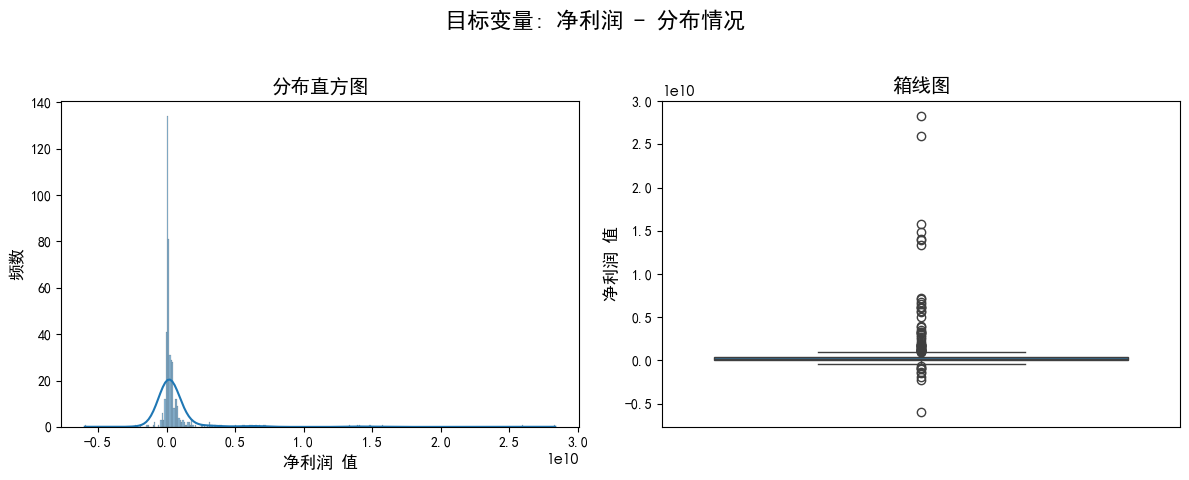


--- 3. 特征选择 (与 '净利润' 的皮尔逊相关性) ---

与 '净利润' 相关系数绝对值 > 0.6 的特征:
支付的各项税费            0.930805
期末现金及现金等价物余额       0.770195
经营活动现金流入小计         0.755068
期初现金及现金等价物余额       0.746850
销售商品、提供劳务收到的现金     0.746585
经营活动现金流出小计         0.741862
投资活动产生的现金流量净额      0.718025
筹资活动现金流出小计         0.715902
现金的期末余额            0.707053
现金的期初余额            0.697185
购买商品、接受劳务支付的现金     0.689569
支付给职工以及为职工支付的现金    0.685944
偿还债务支付的现金          0.681525
投资损失               0.678070
支付其他与经营活动有关的现金     0.668891
经营活动产生的现金流量净额      0.663632
Name: 净利润, dtype: float64

初步选定的特征 (16个): ['销售商品、提供劳务收到的现金', '经营活动现金流入小计', '购买商品、接受劳务支付的现金', '支付给职工以及为职工支付的现金', '支付的各项税费', '支付其他与经营活动有关的现金', '经营活动现金流出小计', '经营活动产生的现金流量净额', '投资活动产生的现金流量净额', '偿还债务支付的现金', '筹资活动现金流出小计', '期初现金及现金等价物余额', '期末现金及现金等价物余额', '投资损失', '现金的期末余额', '现金的期初余额']

--- 4. 处理多重共线性 ---


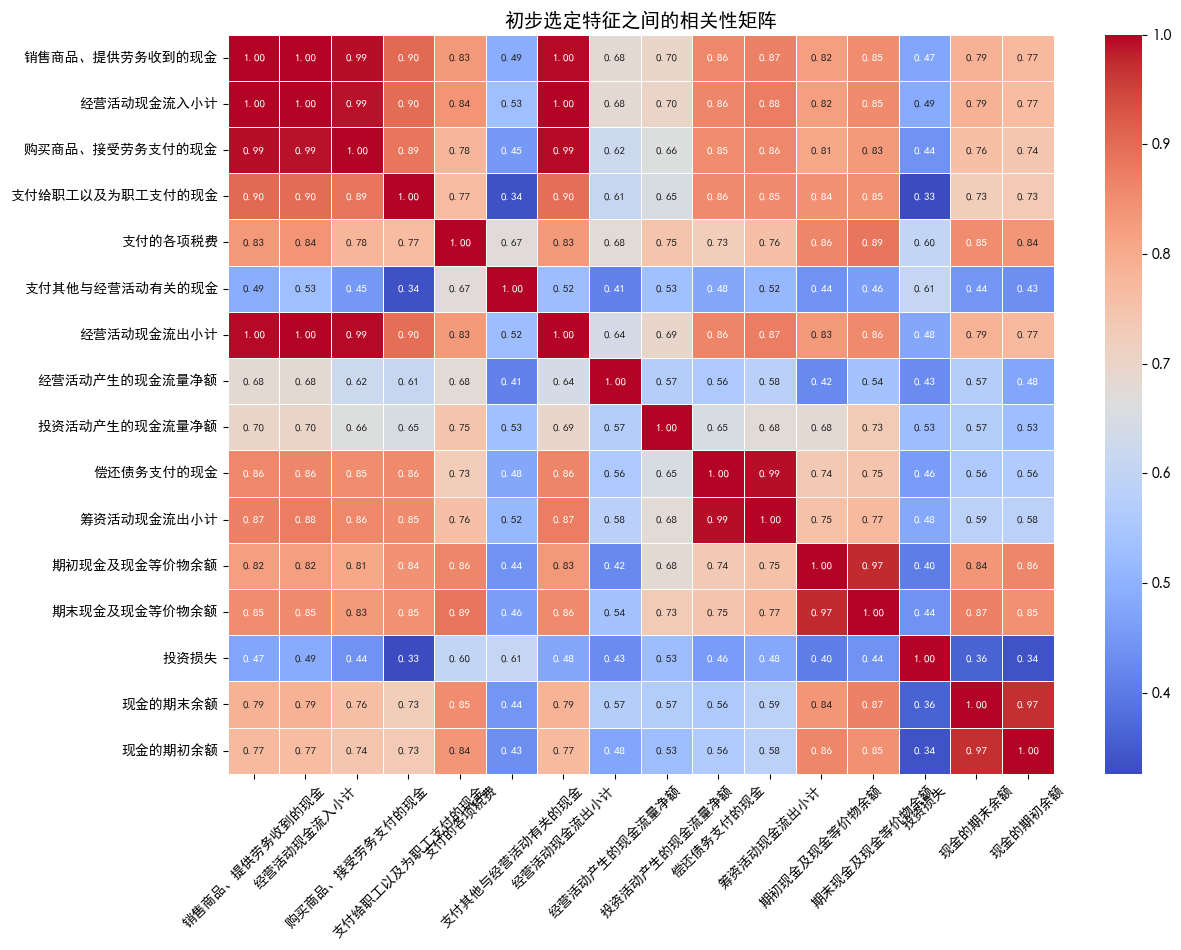

  - 标记移除 '销售商品、提供劳务收到的现金' (与 '经营活动现金流入小计' 相关性 > 0.8, 且 '销售商品、提供劳务收到的现金' 与目标 '净利润' 相关性较低或相等)
  - 标记移除 '购买商品、接受劳务支付的现金' (与 '经营活动现金流入小计' 相关性 > 0.8, 且 '购买商品、接受劳务支付的现金' 与目标 '净利润' 相关性较低)
  - 标记移除 '支付给职工以及为职工支付的现金' (与 '经营活动现金流入小计' 相关性 > 0.8, 且 '支付给职工以及为职工支付的现金' 与目标 '净利润' 相关性较低)
  - 标记移除 '经营活动现金流入小计' (与 '支付的各项税费' 相关性 > 0.8, 且 '经营活动现金流入小计' 与目标 '净利润' 相关性较低或相等)
  - 标记移除 '经营活动现金流出小计' (与 '支付的各项税费' 相关性 > 0.8, 且 '经营活动现金流出小计' 与目标 '净利润' 相关性较低)
  - 标记移除 '偿还债务支付的现金' (与 '筹资活动现金流出小计' 相关性 > 0.8, 且 '偿还债务支付的现金' 与目标 '净利润' 相关性较低或相等)
  - 标记移除 '期初现金及现金等价物余额' (与 '支付的各项税费' 相关性 > 0.8, 且 '期初现金及现金等价物余额' 与目标 '净利润' 相关性较低)
  - 标记移除 '期末现金及现金等价物余额' (与 '支付的各项税费' 相关性 > 0.8, 且 '期末现金及现金等价物余额' 与目标 '净利润' 相关性较低)
  - 标记移除 '现金的期末余额' (与 '支付的各项税费' 相关性 > 0.8, 且 '现金的期末余额' 与目标 '净利润' 相关性较低)
  - 标记移除 '现金的期初余额' (与 '支付的各项税费' 相关性 > 0.8, 且 '现金的期初余额' 与目标 '净利润' 相关性较低)

因多重共线性为目标 '净利润' 移除的特征: ['购买商品、接受劳务支付的现金', '现金的期初余额', '经营活动现金流出小计', '偿还债务支付的现金', '期末现金及现金等价物余额', '现金的期末余额', '期初现金及现金等价物余额', '经营活动现金流入小计', '支付给职工以及为职工支付的现金', '销售商品、提供劳务收到的现金']

最终选

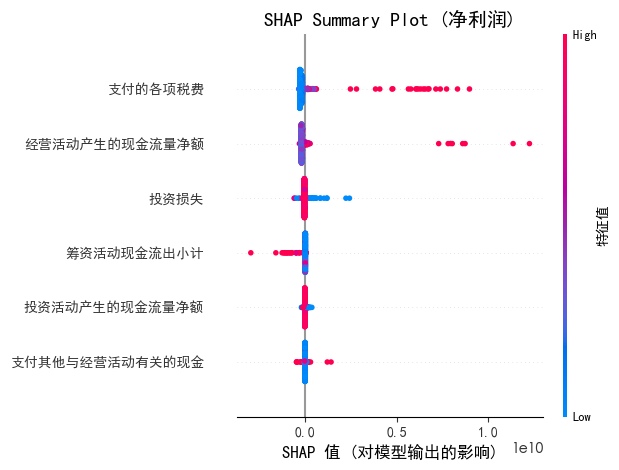


正在生成特征 '支付的各项税费' 的 SHAP Dependence Plot...


<Figure size 640x480 with 0 Axes>

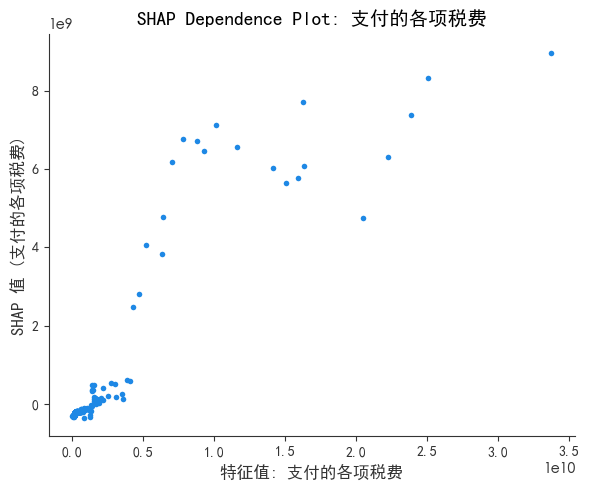



--- 所有目标变量分析完成 ---


In [18]:
# 现金流量表

# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer 
import shap
import warnings
import traceback 

# --- Configuration ---
FILE_PATH = "现金流量表.csv"
TARGET_VARIABLES = ['净利润'] 

# --- Font Configuration ---
FONT_PATH = '/Users/annfengdeye/Library/Fonts/SimHei.ttf' # User specified path
# FONT_PATH = '/System/Library/Fonts/STHeiti Medium.ttc' # macOS Heiti
# FONT_PATH = 'C:/Windows/Fonts/simhei.ttf' # Windows SimHei

# Thresholds
PEARSON_THRESHOLD = 0.6
MULTICOLLINEARITY_THRESHOLD = 0.8

# Font properties sizes
font_label_size = 12
font_title_size = 14
font_tick_size = 10
font_legend_size = 10
font_annot_size = 8

# --- Warnings Configuration ---
warnings.filterwarnings("ignore", message="FixedFormatter should only be used together with FixedLocator")
warnings.filterwarnings("ignore", message="Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.")
warnings.filterwarnings("ignore", category=UserWarning, module='shap')
warnings.filterwarnings("ignore", category=FutureWarning) # Ignore future warnings

# --- Font Setup ---
my_font_prop = None
try:
    if FONT_PATH and os.path.exists(FONT_PATH):
        my_font_prop = fm.FontProperties(fname=FONT_PATH)
        font_name = my_font_prop.get_name()
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
        plt.rcParams['axes.unicode_minus'] = False
        print(f"字体设置: 成功加载字体 '{font_name}' from {FONT_PATH}")
    else:
        # Fallback to common Chinese fonts if specific path fails or not provided
        common_fonts = ['SimHei', 'Microsoft YaHei', 'PingFang SC', 'STHeiti', 'Heiti TC', 'sans-serif'] # Added sans-serif as last resort
        found_font = None
        for font in common_fonts:
             try:
                 # Check if font is findable by Matplotlib
                 fm.findfont(font, fallback_to_default=False)
                 found_font = font
                 break
             except:
                 continue # Font not found, try next

        if found_font:
            plt.rcParams['font.family'] = 'sans-serif' # Base family
            plt.rcParams['font.sans-serif'] = [found_font] + plt.rcParams['font.sans-serif'] # Prepend found font
            plt.rcParams['axes.unicode_minus'] = False
            my_font_prop = fm.FontProperties(family=found_font) # Create FontProperties from family name
            print(f"字体设置: 自动找到并设置字体 '{found_font}'")
        else:
            if FONT_PATH:
                print(f"警告: 指定的字体文件未找到: {FONT_PATH} 且未能自动找到常用中文字体。")
            else:
                print(f"警告: 未指定字体路径 (FONT_PATH) 且未能自动找到常用中文字体。")
            print("将使用 Matplotlib 默认字体，中文可能显示为方块。")
            plt.rcParams['axes.unicode_minus'] = False
            my_font_prop = fm.FontProperties() # Use default properties

except Exception as e:
    print(f"字体设置时出错: {e}")
    print("将使用 Matplotlib 默认字体。")
    plt.rcParams['axes.unicode_minus'] = False
    my_font_prop = fm.FontProperties() # Use default

# --- 1. 数据加载与预处理 ---
print(f"\n--- 1. 加载和预处理数据 ({FILE_PATH}) ---")
try:
    try:
        df = pd.read_csv(FILE_PATH, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(FILE_PATH, encoding='gbk')
    print(f"--- 成功从 {FILE_PATH} 加载数据 ---")
except FileNotFoundError:
    print(f"错误：文件 '{FILE_PATH}' 未找到。请确保文件在此脚本的同一目录或提供完整路径。")
    exit()
except Exception as e:
    print(f"读取文件 '{FILE_PATH}' 时发生错误: {e}")
    exit()

# # Drop specified columns if needed (example)
# if 'COLUMNS_TO_DROP' in globals() and COLUMNS_TO_DROP:
#     print(f"删除列: {COLUMNS_TO_DROP}")
#     df = df.drop(columns=COLUMNS_TO_DROP, errors='ignore')

# Convert '统计日期' to datetime
df['统计日期'] = pd.to_datetime(df['统计日期'], errors='coerce')

# Convert potential numeric columns to numeric, coercing errors
print("转换数值列...")
all_columns = df.columns
numeric_cols_potential = [col for col in all_columns if col not in ['股票代码', '统计日期']]
for col in numeric_cols_potential:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for NaNs introduced during conversion or originally present
nan_check = df.isnull().sum()
if nan_check.sum() > 0:
    print("\n警告：数据中存在缺失值 (NaN)。将在每个目标变量分析和模型训练前处理。")
    # print(nan_check[nan_check > 0]) # Optionally print columns with NaNs

print("--- 数据预处理完成 ---")
print(f"数据总维度 (预处理后): {df.shape}")
if df.empty:
    print("错误：预处理后数据为空。")
    exit()

# --- Loop through each target variable for analysis ---
for target_variable in TARGET_VARIABLES:
    print(f"\n\n{'='*20} 分析目标变量: {target_variable} {'='*20}")

    if target_variable not in df.columns:
        print(f"错误: 目标变量 '{target_variable}' 不在数据框中。跳过此目标变量。")
        continue

    # Create a copy for this target's analysis and drop rows where THIS target is NaN
    df_target = df.dropna(subset=[target_variable]).copy()
    if df_target.empty:
        print(f"警告: 移除 '{target_variable}' 的缺失值后数据为空。跳过此目标变量。")
        continue
    print(f"用于 '{target_variable}' 分析的数据维度 (移除目标NaN后): {df_target.shape}")


    # --- 2. 目标变量分析 ({target_variable} 分布) ---
    print(f"\n--- 2. 目标变量 '{target_variable}' 分布分析 ---")
    print(f"\n'{target_variable}' 的描述性统计:")
    print(df_target[target_variable].describe())

    fig_dist, axes_dist = plt.subplots(1, 2, figsize=(12, 5))
    fig_dist.suptitle(f"目标变量: {target_variable} - 分布情况", fontproperties=my_font_prop, size=font_title_size + 2)

    # Histogram
    sns.histplot(df_target[target_variable], kde=True, ax=axes_dist[0])
    axes_dist[0].set_title('分布直方图', fontproperties=my_font_prop, size=font_title_size)
    axes_dist[0].set_xlabel(f"{target_variable} 值", fontproperties=my_font_prop, size=font_label_size)
    axes_dist[0].set_ylabel("频数", fontproperties=my_font_prop, size=font_label_size)
    for label in axes_dist[0].get_xticklabels() + axes_dist[0].get_yticklabels():
        label.set_fontproperties(my_font_prop)
        label.set_size(font_tick_size)

    # Boxplot
    sns.boxplot(y=df_target[target_variable], ax=axes_dist[1])
    axes_dist[1].set_title('箱线图', fontproperties=my_font_prop, size=font_title_size)
    axes_dist[1].set_ylabel(f"{target_variable} 值", fontproperties=my_font_prop, size=font_label_size)
    axes_dist[1].set_xlabel("")
    for label in axes_dist[1].get_yticklabels():
        label.set_fontproperties(my_font_prop)
        label.set_size(font_tick_size)
    axes_dist[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()
    # Removed SMOTE comment as it's implicitly handled by using regression


    # --- 3. 特征选择 (Pearson Correlation) ---
    print(f"\n--- 3. 特征选择 (与 '{target_variable}' 的皮尔逊相关性) ---")
    # Identify potential features for *this* target analysis
    numeric_cols = df_target.select_dtypes(include=np.number).columns.tolist()
    # Exclude ALL target variables defined in TARGET_VARIABLES and non-numeric IDs
    potential_features = [col for col in numeric_cols if col not in TARGET_VARIABLES + ['股票代码']]
    # Ensure features actually exist in the current df_target and are numeric
    valid_features = [f for f in potential_features if f in df_target.columns and pd.api.types.is_numeric_dtype(df_target[f])]

    if not valid_features:
        print("错误：在此数据子集中没有有效的数值特征列可用于相关性分析。")
        final_selected_features = [] # Initialize for this target
    else:
        # Calculate correlations only with valid features and the current target
        # Need to handle potential NaNs in features before calculating correlation
        cols_for_corr = valid_features + [target_variable]
        corr_df = df_target[cols_for_corr].copy()
        # Optional: Impute NaNs only for correlation calculation if desired, or rely on pair-wise nature of .corr()
        # Example: corr_df.fillna(corr_df.median(), inplace=True)
        correlations = corr_df.corr(method='pearson')[target_variable].drop(target_variable, errors='ignore').dropna()

        highly_correlated_features = correlations[abs(correlations) > PEARSON_THRESHOLD]
        print(f"\n与 '{target_variable}' 相关系数绝对值 > {PEARSON_THRESHOLD} 的特征:")
        if highly_correlated_features.empty:
            print("未找到符合条件的特征。")
            selected_features_stage1 = []
        else:
            # Sort by absolute correlation value, descending
            print(highly_correlated_features.abs().sort_values(ascending=False))
            selected_features_stage1 = highly_correlated_features.index.tolist()
        print(f"\n初步选定的特征 ({len(selected_features_stage1)}个): {selected_features_stage1}")

        # Proceed only if stage 1 features were found
        if not selected_features_stage1:
            print(f"\n警告：未找到与 '{target_variable}' 相关性足够高的特征。")
            final_selected_features = [] # Set final features to empty for this target
        else:
            # --- 4. 处理多重共线性 ---
            print("\n--- 4. 处理多重共线性 ---")
            if len(selected_features_stage1) > 1:
                # Ensure features are still in df_target columns (should be, but good practice)
                selected_features_stage1 = [f for f in selected_features_stage1 if f in df_target.columns]
                if len(selected_features_stage1) <= 1:
                    print("\n经过检查，只剩一个或零个初步选定特征，无需处理多重共线性。")
                    final_selected_features = selected_features_stage1
                else:
                    # Calculate correlation matrix ONLY for the selected features on df_target
                    correlation_matrix_selected = df_target[selected_features_stage1].corr(method='pearson').abs()

                    # Plot heatmap
                    fig_heatmap, ax_heatmap = plt.subplots(figsize=(max(8, len(selected_features_stage1)*0.8), max(6, len(selected_features_stage1)*0.6)))
                    sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f",
                                linewidths=.5, ax=ax_heatmap, annot_kws={"size": font_annot_size})
                    ax_heatmap.set_title('初步选定特征之间的相关性矩阵', fontproperties=my_font_prop, size=font_title_size)
                    ax_heatmap.tick_params(axis='x', rotation=45)
                    ax_heatmap.tick_params(axis='y', rotation=0)
                    for label in ax_heatmap.get_xticklabels() + ax_heatmap.get_yticklabels():
                        label.set_fontproperties(my_font_prop)
                        label.set_size(font_tick_size)
                    # Attempt to set font for annotations (might not always work depending on backend)
                    try:
                        for text in ax_heatmap.texts:
                            # May need to adjust size slightly if using FontProperties directly
                            text.set_fontproperties(my_font_prop)
                            text.set_size(font_annot_size) # Ensure size consistency
                    except Exception as e_annot:
                        print(f"注: 未能直接为热力图注释设置字体 ({e_annot}).")

                    plt.tight_layout()
                    plt.show()

                    # Remove collinear features logic (based on correlation with CURRENT target)
                    features_to_remove = set()
                    for i in range(len(correlation_matrix_selected.columns)):
                        for j in range(i):
                            feature_i = correlation_matrix_selected.columns[i]
                            feature_j = correlation_matrix_selected.columns[j]
                            # Check if either feature is already marked for removal
                            if feature_i in features_to_remove or feature_j in features_to_remove:
                                continue
                            # Check for high correlation between features
                            if correlation_matrix_selected.iloc[i, j] > MULTICOLLINEARITY_THRESHOLD:
                                # Get absolute correlation OF EACH FEATURE with the CURRENT target
                                corr_i_target = abs(correlations.get(feature_i, 0)) # Use correlations calculated earlier
                                corr_j_target = abs(correlations.get(feature_j, 0))
                                # Decide which feature to remove (the one less correlated with the target)
                                if corr_i_target < corr_j_target:
                                    features_to_remove.add(feature_i)
                                    print(f"  - 标记移除 '{feature_i}' (与 '{feature_j}' 相关性 > {MULTICOLLINEARITY_THRESHOLD}, 且 '{feature_i}' 与目标 '{target_variable}' 相关性较低)")
                                else: # If correlations are equal or i >= j, remove j (or i, choice is often arbitrary but consistent)
                                    features_to_remove.add(feature_j)
                                    print(f"  - 标记移除 '{feature_j}' (与 '{feature_i}' 相关性 > {MULTICOLLINEARITY_THRESHOLD}, 且 '{feature_j}' 与目标 '{target_variable}' 相关性较低或相等)")


                    final_selected_features = [f for f in selected_features_stage1 if f not in features_to_remove]
                    if features_to_remove:
                        print(f"\n因多重共线性为目标 '{target_variable}' 移除的特征: {list(features_to_remove)}")
                    else:
                        print("\n未发现需要因多重共线性移除的特征。")
                    print(f"\n最终选定的特征 ({len(final_selected_features)}个) for '{target_variable}': {final_selected_features}")

            elif len(selected_features_stage1) == 1:
                final_selected_features = selected_features_stage1
                print("\n只有一个初步选定的特征，无需处理多重共线性。")
                print(f"\n最终选定的特征 ({len(final_selected_features)}个) for '{target_variable}': {final_selected_features}")
            else: # Should not happen based on previous check, but for completeness
                 final_selected_features = []
                 print("\n没有初步选定的特征。")


    # --- 5. 特征有效性评估 (SHAP) ---
    print(f"\n--- 5. 特征有效性评估 (SHAP for {target_variable}) ---")

    if 'final_selected_features' in locals() and final_selected_features: # Check if variable exists and is not empty
        # Ensure selected features still exist in the target-specific dataframe columns
        final_selected_features = [f for f in final_selected_features if f in df_target.columns]

        if not final_selected_features:
            print(f"\n错误：没有最终有效的特征可用于 '{target_variable}' 的SHAP分析。")
        elif target_variable not in df_target.columns:
             print(f"\n错误：目标变量 '{target_variable}' 不在当前数据帧 df_target 中 (这不应该发生)。")
        else:
            X = df_target[final_selected_features].copy()
            y = df_target[target_variable].copy()

            if X.empty or y.empty or X.shape[0] < 2:
                print("\n警告：用于训练的数据不足（行数<2 或 无有效特征）。无法进行SHAP分析。")
            else:
                print("\n注意：将在当前可用数据上训练模型并计算SHAP值。")
                try:
                    # Handle NaN/inf in final X JUST before training using SimpleImputer
                    if X.isnull().values.any() or np.isinf(X.values).any():
                        print("\n警告：最终特征数据(X)中存在NaN或无穷大值，使用中位数填充...")
                        # Replace Inf with NaN first, as imputer might handle them differently
                        X.replace([np.inf, -np.inf], np.nan, inplace=True)
                        # Use SimpleImputer for median imputation
                        imputer = SimpleImputer(strategy='median')
                        X_imputed = imputer.fit_transform(X)
                        # Convert back to DataFrame to retain column names and index
                        X = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)
                        print("填充完成。")


                    # Final check for NaNs/Infs in X and y before training
                    if y.isnull().values.any() or np.isinf(y.values).any():
                        print(f"\n错误：目标变量(y: {target_variable})中存在NaN或无穷大值，无法训练模型。")
                    elif X.isnull().values.any():
                         print("\n错误：尝试填充X后仍存在NaN，无法训练模型。检查填充逻辑。")
                    else:
                        # Train Model
                        model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5, min_samples_leaf=1)
                        print(f"开始为 '{target_variable}' 训练随机森林模型...")
                        model.fit(X, y)
                        print("模型训练完成。")

                        # Explain Model using SHAP
                        print("正在计算 SHAP 值...")
                        explainer = shap.TreeExplainer(model)
                        shap_values = explainer.shap_values(X)
                        feature_names_for_plot = X.columns.tolist()
                        print("SHAP 值计算完成。")

                        print("\n正在生成 SHAP Summary Plot...")
                        plt.figure() # Create a new figure for SHAP plot
                        # Generate plot but don't show immediately to allow customization
                        shap.summary_plot(shap_values, X, feature_names=feature_names_for_plot, show=False, plot_size=None)

                        # Customize plot with font properties (Post-hoc modification)
                        try:
                            ax_shap_summary = plt.gcf().get_axes()[0] # Main plot axes
                            cbar_ax = plt.gcf().get_axes()[1] if len(plt.gcf().get_axes()) > 1 else None # Color bar axes, if exists

                            ax_shap_summary.set_title(f'SHAP Summary Plot ({target_variable})', fontproperties=my_font_prop, size=font_title_size)
                            ax_shap_summary.set_xlabel("SHAP 值 (对模型输出的影响)", fontproperties=my_font_prop, size=font_label_size)

                            # Set font for y-tick labels (feature names)
                            for label in ax_shap_summary.get_yticklabels():
                                label.set_fontproperties(my_font_prop)
                                label.set_size(font_tick_size)
                            # Set font for x-tick labels
                            for label in ax_shap_summary.get_xticklabels():
                                label.set_fontproperties(my_font_prop)
                                label.set_size(font_tick_size)

                            # Customize color bar if it exists
                            if cbar_ax and hasattr(cbar_ax, 'set_ylabel'):
                                cbar_ax.set_ylabel("特征值", fontproperties=my_font_prop, size=font_tick_size)
                                for label in cbar_ax.get_yticklabels():
                                    label.set_fontproperties(my_font_prop)
                                    label.set_size(font_tick_size - 1) # Slightly smaller for colorbar ticks often looks better
                        except IndexError:
                             print("警告：无法获取SHAP图的轴对象进行字体自定义。")
                        except Exception as e_cust:
                            print(f"警告：自定义SHAP Summary Plot字体时出错: {e_cust}")


                        plt.tight_layout()
                        plt.show()


                        # Generate Dependence Plot for the first feature (often most important)
                        if len(feature_names_for_plot) > 0:
                            # Choose the feature with the highest mean absolute SHAP value for dependence plot
                            mean_abs_shap = np.abs(shap_values).mean(axis=0)
                            feature_to_plot_index = np.argmax(mean_abs_shap)
                            feature_to_plot = feature_names_for_plot[feature_to_plot_index]
                            # Or simply plot the first one: feature_to_plot = feature_names_for_plot[0]

                            print(f"\n正在生成特征 '{feature_to_plot}' 的 SHAP Dependence Plot...")
                            plt.figure() # Create a new figure
                            shap.dependence_plot(feature_to_plot_index, shap_values, X, feature_names=feature_names_for_plot, interaction_index=None, show=False)

                            # Customize plot with font properties (Post-hoc modification)
                            try:
                                ax_shap_dep = plt.gca()
                                ax_shap_dep.set_title(f"SHAP Dependence Plot: {feature_to_plot}", fontproperties=my_font_prop, size=font_title_size)
                                ax_shap_dep.set_ylabel(f"SHAP 值 ({feature_to_plot})", fontproperties=my_font_prop, size=font_label_size)
                                ax_shap_dep.set_xlabel(f"特征值: {feature_to_plot}", fontproperties=my_font_prop, size=font_label_size)
                                for label in ax_shap_dep.get_xticklabels() + ax_shap_dep.get_yticklabels():
                                    label.set_fontproperties(my_font_prop)
                                    label.set_size(font_tick_size)
                            except Exception as e_cust_dep:
                                print(f"警告：自定义SHAP Dependence Plot字体时出错: {e_cust_dep}")


                            plt.tight_layout()
                            plt.show()
                        else:
                            print("没有特征可绘制依赖图。")


                except Exception as e:
                    print(f"\n训练模型或生成SHAP图时出错 (目标: {target_variable}): {e}")
                    traceback.print_exc() # Print detailed traceback
    else:
        print(f"\n没有最终选定的特征用于 '{target_variable}'，无法进行SHAP分析。")

print("\n\n--- 所有目标变量分析完成 ---")

字体设置: 成功加载字体 'Heiti TC' from /System/Library/Fonts/STHeiti Medium.ttc

--- 1. 加载和预处理数据 (资产负债表.csv) ---
--- 成功从 资产负债表.csv 加载数据 ---
删除列: ['流动资产/流动负债', '有形资产/总资产']
转换数值列...
--- 数据预处理完成 ---
数据维度 (预处理后): (994, 26)


==================== 分析目标变量: 固定资产 ====================
使用数据维度 (移除 '固定资产' NaN 后): (994, 26)

--- 2. 目标变量 '固定资产' 分布分析 ---

'固定资产' 的描述性统计:
count    9.940000e+02
mean     4.002101e+09
std      9.520001e+09
min      3.454693e+06
25%      3.795855e+08
50%      9.088341e+08
75%      2.831596e+09
max      7.842659e+10
Name: 固定资产, dtype: float64


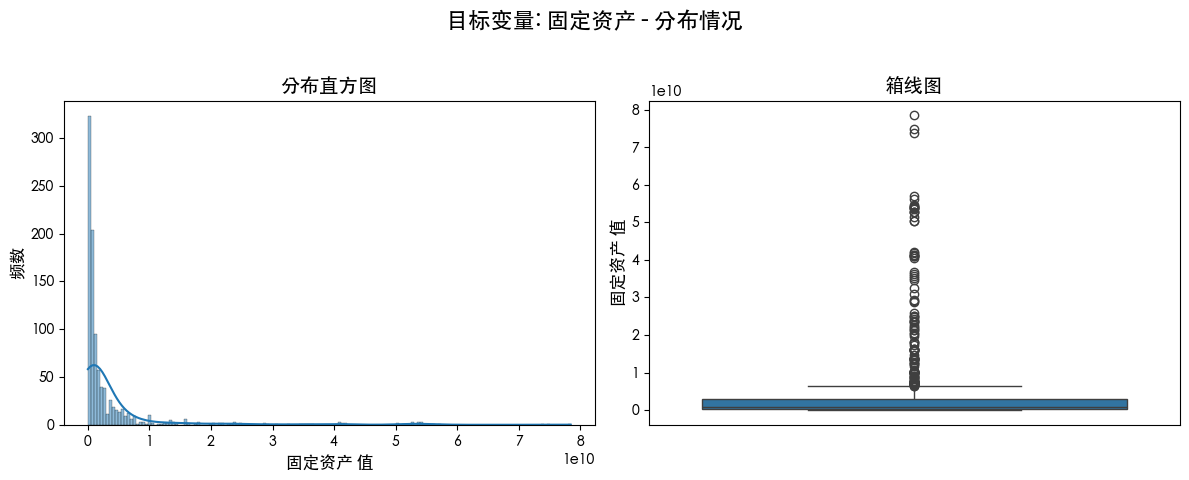


--- 3. 特征选择 (与 '固定资产' 的皮尔逊相关性) ---

与 '固定资产' 相关系数绝对值 > 0.6 的特征:
非流动资产合计          0.817159
资本公积             0.772956
实收资本（股本）         0.751148
归属于母公司所有者权益合计    0.736773
所有者权益合计          0.719564
非流动负债合计          0.701651
应收账款             0.679360
应付账款             0.663968
资产总计             0.655717
负债及股东权益总计        0.655717
负债合计             0.628799
无形资产             0.620672
货币资金             0.617482
Name: 固定资产, dtype: float64

初步选定的特征 (13个): ['货币资金', '应收账款', '无形资产', '非流动资产合计', '资产总计', '应付账款', '非流动负债合计', '负债合计', '实收资本（股本）', '资本公积', '归属于母公司所有者权益合计', '所有者权益合计', '负债及股东权益总计']

--- 4. 处理多重共线性 ---


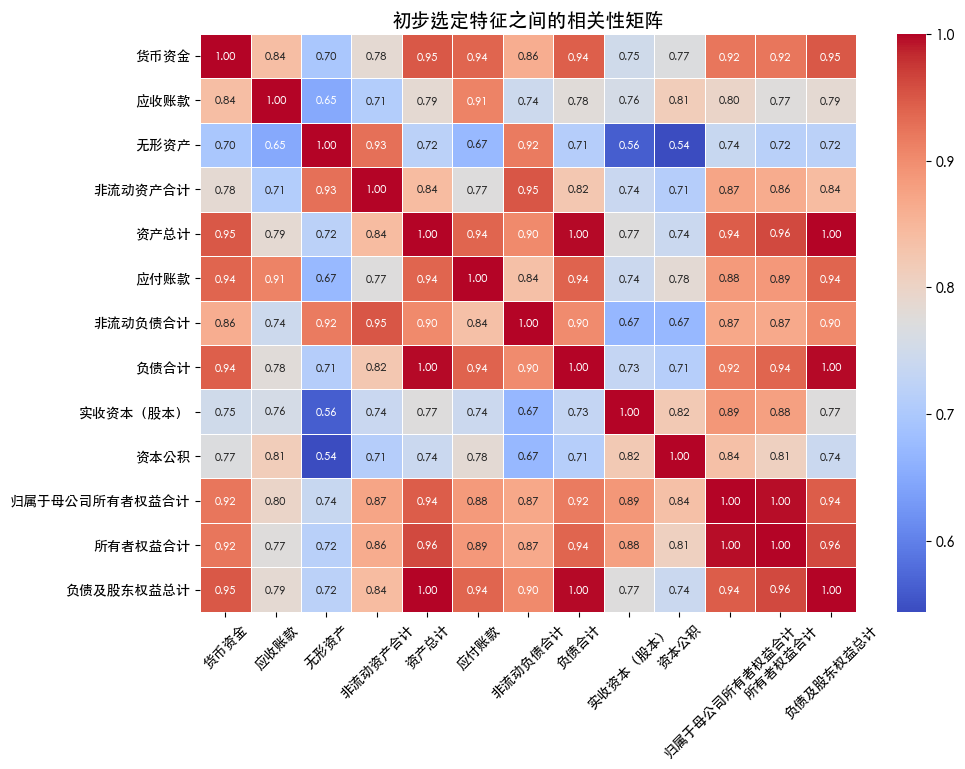

  - 标记移除 '货币资金' (与 '应收账款' 相关性 > 0.8, 且 '货币资金' 与目标相关性较低或相等)
  - 标记移除 '无形资产' (与 '非流动资产合计' 相关性 > 0.8, 且 '无形资产' 与目标相关性较低或相等)
  - 标记移除 '资产总计' (与 '非流动资产合计' 相关性 > 0.8, 且 '资产总计' 与目标相关性较低)
  - 标记移除 '应付账款' (与 '应收账款' 相关性 > 0.8, 且 '应付账款' 与目标相关性较低)
  - 标记移除 '非流动负债合计' (与 '非流动资产合计' 相关性 > 0.8, 且 '非流动负债合计' 与目标相关性较低)
  - 标记移除 '负债合计' (与 '非流动资产合计' 相关性 > 0.8, 且 '负债合计' 与目标相关性较低)
  - 标记移除 '应收账款' (与 '资本公积' 相关性 > 0.8, 且 '应收账款' 与目标相关性较低或相等)
  - 标记移除 '实收资本（股本）' (与 '资本公积' 相关性 > 0.8, 且 '实收资本（股本）' 与目标相关性较低或相等)
  - 标记移除 '归属于母公司所有者权益合计' (与 '非流动资产合计' 相关性 > 0.8, 且 '归属于母公司所有者权益合计' 与目标相关性较低)
  - 标记移除 '所有者权益合计' (与 '非流动资产合计' 相关性 > 0.8, 且 '所有者权益合计' 与目标相关性较低)
  - 标记移除 '负债及股东权益总计' (与 '非流动资产合计' 相关性 > 0.8, 且 '负债及股东权益总计' 与目标相关性较低)

因多重共线性移除的特征: ['负债合计', '应付账款', '货币资金', '应收账款', '资产总计', '实收资本（股本）', '归属于母公司所有者权益合计', '非流动负债合计', '无形资产', '所有者权益合计', '负债及股东权益总计']

最终选定的特征 (2个): ['非流动资产合计', '资本公积']

--- 5. 特征有效性评估 (SHAP for 固定资产) ---

注意：将在当前可用数据上训练模型并计算SHAP值。

正在生成 SHAP Summary Plot...


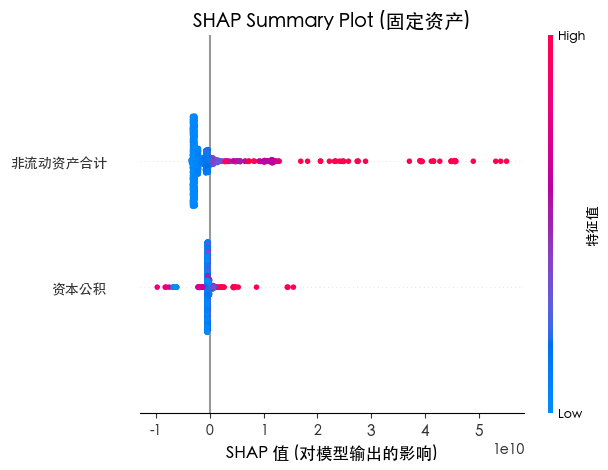


正在生成特征 '非流动资产合计' 的 SHAP Dependence Plot...


<Figure size 640x480 with 0 Axes>

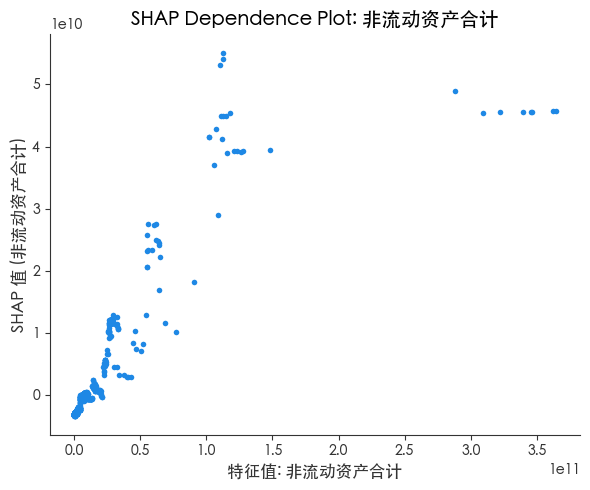



==================== 分析目标变量: 流动资产合计 ====================
使用数据维度 (移除 '流动资产合计' NaN 后): (994, 26)

--- 2. 目标变量 '流动资产合计' 分布分析 ---

'流动资产合计' 的描述性统计:
count    9.940000e+02
mean     2.374068e+10
std      8.390642e+10
min      6.750794e+07
25%      1.656563e+09
50%      3.526153e+09
75%      1.046096e+10
max      7.210000e+11
Name: 流动资产合计, dtype: float64


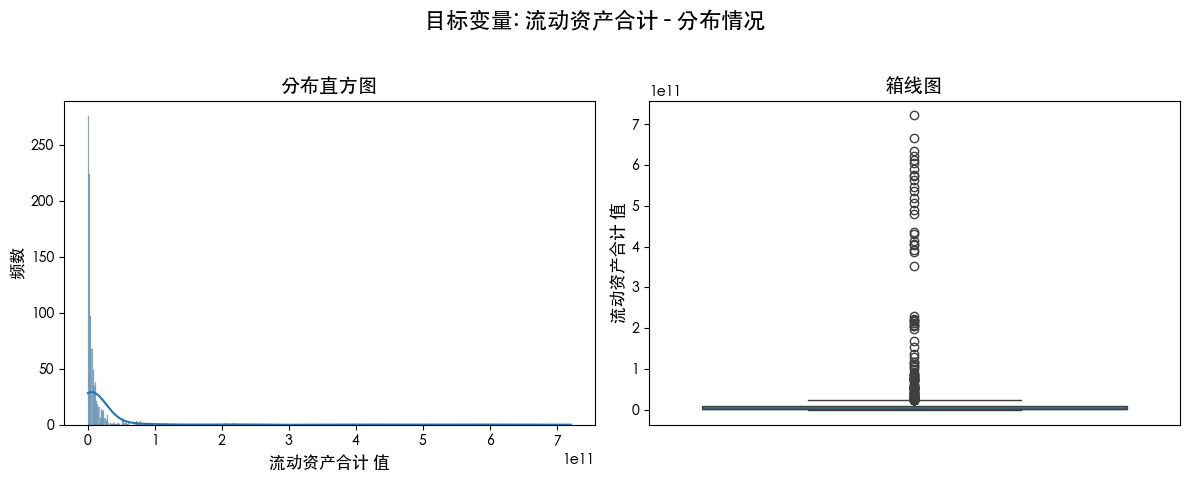


--- 3. 特征选择 (与 '流动资产合计' 的皮尔逊相关性) ---

与 '流动资产合计' 相关系数绝对值 > 0.6 的特征:
流动负债合计           0.993823
负债合计             0.978211
负债及股东权益总计        0.974864
资产总计             0.974864
存货               0.959034
其他应付款            0.938261
其他应收款            0.932741
货币资金             0.931680
预付账款             0.930490
应付账款             0.921760
所有者权益合计          0.915899
预收账款             0.892574
归属于母公司所有者权益合计    0.889223
应交税费             0.883382
非流动负债合计          0.802575
应付职工薪酬           0.763943
应收账款             0.746566
实收资本（股本）         0.717504
非流动资产合计          0.700141
资本公积             0.686174
盈余公积             0.682940
Name: 流动资产合计, dtype: float64

初步选定的特征 (21个): ['货币资金', '应收账款', '预付账款', '其他应收款', '存货', '非流动资产合计', '资产总计', '应付账款', '预收账款', '应付职工薪酬', '应交税费', '其他应付款', '流动负债合计', '非流动负债合计', '负债合计', '实收资本（股本）', '资本公积', '盈余公积', '归属于母公司所有者权益合计', '所有者权益合计', '负债及股东权益总计']

--- 4. 处理多重共线性 ---


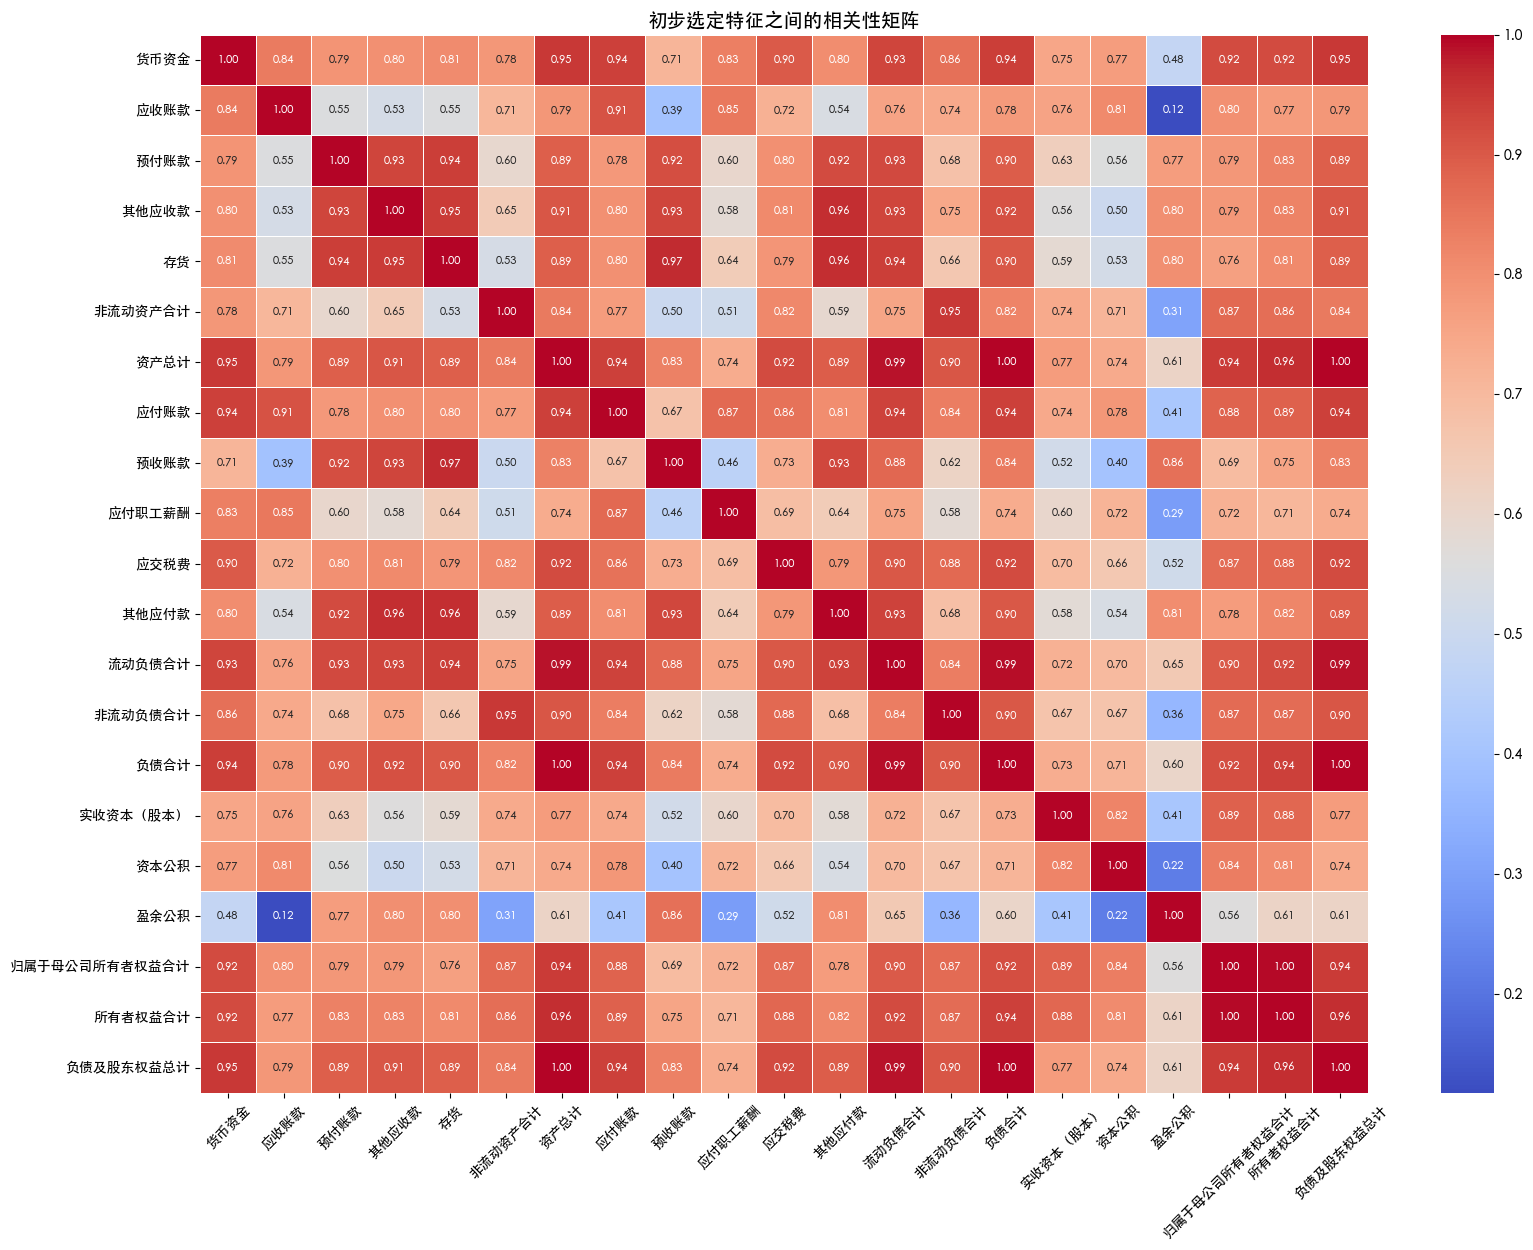

  - 标记移除 '应收账款' (与 '货币资金' 相关性 > 0.8, 且 '应收账款' 与目标相关性较低)
  - 标记移除 '预付账款' (与 '其他应收款' 相关性 > 0.8, 且 '预付账款' 与目标相关性较低或相等)
  - 标记移除 '货币资金' (与 '存货' 相关性 > 0.8, 且 '货币资金' 与目标相关性较低或相等)
  - 标记移除 '其他应收款' (与 '存货' 相关性 > 0.8, 且 '其他应收款' 与目标相关性较低或相等)
  - 标记移除 '存货' (与 '资产总计' 相关性 > 0.8, 且 '存货' 与目标相关性较低或相等)
  - 标记移除 '非流动资产合计' (与 '资产总计' 相关性 > 0.8, 且 '非流动资产合计' 与目标相关性较低或相等)
  - 标记移除 '应付账款' (与 '资产总计' 相关性 > 0.8, 且 '应付账款' 与目标相关性较低)
  - 标记移除 '预收账款' (与 '资产总计' 相关性 > 0.8, 且 '预收账款' 与目标相关性较低)
  - 标记移除 '应交税费' (与 '资产总计' 相关性 > 0.8, 且 '应交税费' 与目标相关性较低)
  - 标记移除 '其他应付款' (与 '资产总计' 相关性 > 0.8, 且 '其他应付款' 与目标相关性较低)
  - 标记移除 '资产总计' (与 '流动负债合计' 相关性 > 0.8, 且 '资产总计' 与目标相关性较低或相等)
  - 标记移除 '非流动负债合计' (与 '流动负债合计' 相关性 > 0.8, 且 '非流动负债合计' 与目标相关性较低)
  - 标记移除 '负债合计' (与 '流动负债合计' 相关性 > 0.8, 且 '负债合计' 与目标相关性较低)
  - 标记移除 '资本公积' (与 '实收资本（股本）' 相关性 > 0.8, 且 '资本公积' 与目标相关性较低)
  - 标记移除 '归属于母公司所有者权益合计' (与 '流动负债合计' 相关性 > 0.8, 且 '归属于母公司所有者权益合计' 与目标相关性较低)
  - 标记移除 '所有者权益合计' (与 '流动负债合计' 相关性 > 0.8, 且 '所有者权益合计' 与目标相关性较低)
  - 标记移除 '负债及股东权益总计' (与 '流动负债合计' 相关性 > 

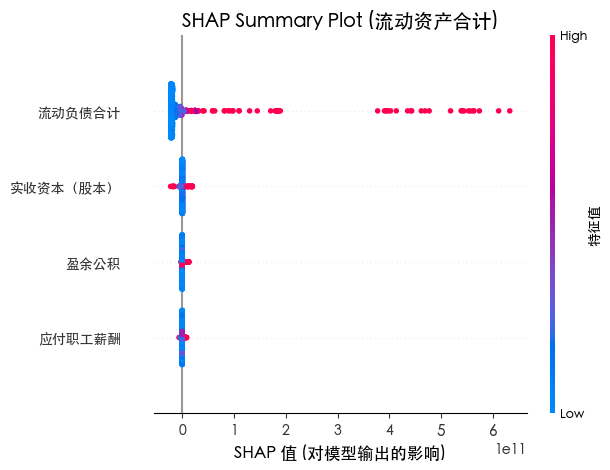


正在生成特征 '应付职工薪酬' 的 SHAP Dependence Plot...


<Figure size 640x480 with 0 Axes>

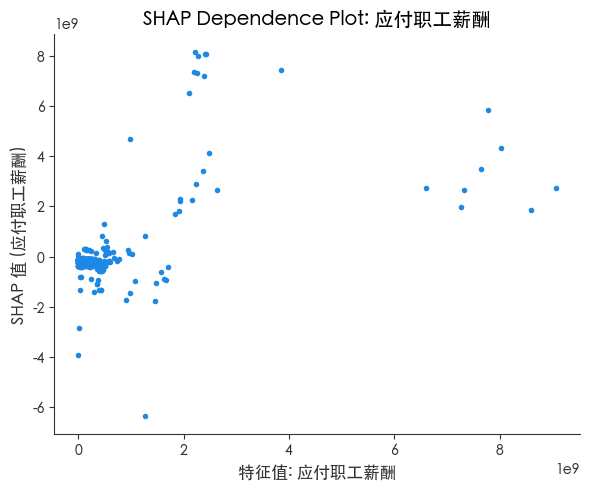



--- 所有目标变量分析完成 ---


In [12]:
# 资产负债表

# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
import os 
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer 
import shap
import warnings

# --- Configuration ---
FILE_PATH = "资产负债表.csv"
TARGET_VARIABLES = ['固定资产', '流动资产合计']
COLUMNS_TO_DROP = ['流动资产/流动负债', '有形资产/总资产']
FONT_PATH = '/System/Library/Fonts/STHeiti Medium.ttc'
# FONT_PATH = '/path/to/your/SimHei.ttf' 
# FONT_PATH = 'C:/Windows/Fonts/simhei.ttf' # path for Windows

PEARSON_THRESHOLD = 0.6
MULTICOLLINEARITY_THRESHOLD = 0.8

# Font properties
font_label_size = 12
font_title_size = 14
font_tick_size = 10
font_legend_size = 10
font_annot_size = 8

# --- Warnings Configuration ---
warnings.filterwarnings("ignore", message="FixedFormatter should only be used together with FixedLocator")
warnings.filterwarnings("ignore", message="Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.")
warnings.filterwarnings("ignore", category=UserWarning, module='shap')
warnings.filterwarnings("ignore", category=FutureWarning) # Ignore future warnings often from libraries

# --- Font Setup ---
my_font_prop = None
try:
    if FONT_PATH and os.path.exists(FONT_PATH):
        my_font_prop = fm.FontProperties(fname=FONT_PATH)
        font_name = my_font_prop.get_name()
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
        plt.rcParams['axes.unicode_minus'] = False
        print(f"字体设置: 成功加载字体 '{font_name}' from {FONT_PATH}")
    else:
        common_fonts = ['SimHei', 'Microsoft YaHei', 'PingFang SC', 'STHeiti']
        found_font = None
        for font in common_fonts:
             try:
                 fm.findfont(font, fallback_to_default=False)
                 found_font = font
                 break
             except:
                 continue # Font not found

        if found_font:
            plt.rcParams['font.family'] = 'sans-serif'
            plt.rcParams['font.sans-serif'] = [found_font] + plt.rcParams['font.sans-serif']
            plt.rcParams['axes.unicode_minus'] = False
            my_font_prop = fm.FontProperties(family=found_font) # Create FontProperties from family name
            print(f"字体设置: 自动找到并设置字体 '{found_font}'")
        else:
            print(f"警告: 指定的字体文件未找到: {FONT_PATH} 且未能自动找到常用中文字体。")
            print("将使用 Matplotlib 默认字体，中文可能显示为方块。")
            plt.rcParams['axes.unicode_minus'] = False
            my_font_prop = fm.FontProperties() # Use default
except Exception as e:
    print(f"字体设置时出错: {e}")
    print("将使用 Matplotlib 默认字体。")
    plt.rcParams['axes.unicode_minus'] = False
    my_font_prop = fm.FontProperties() # Use default

# --- 1. 数据加载与预处理 ---
print(f"\n--- 1. 加载和预处理数据 ({FILE_PATH}) ---")
try:
    try:
        df = pd.read_csv(FILE_PATH, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(FILE_PATH, encoding='gbk')
    print(f"--- 成功从 {FILE_PATH} 加载数据 ---")
except FileNotFoundError:
    print(f"错误：文件 '{FILE_PATH}' 未找到。请确保文件在此脚本的同一目录或提供完整路径。")
    exit()
except Exception as e:
    print(f"读取文件 '{FILE_PATH}' 时发生错误: {e}")
    exit()

# Drop specified columns
print(f"删除列: {COLUMNS_TO_DROP}")
df = df.drop(columns=COLUMNS_TO_DROP, errors='ignore') # errors='ignore' prevents error if columns don't exist

# Convert '统计日期' to datetime
df['统计日期'] = pd.to_datetime(df['统计日期'], errors='coerce')

# Convert potential numeric columns to numeric, coercing errors
print("转换数值列...")
all_columns = df.columns
numeric_cols_potential = [col for col in all_columns if col not in ['股票代码', '统计日期']]
for col in numeric_cols_potential:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for NaNs introduced during conversion or originally present
nan_check = df.isnull().sum()
if nan_check.sum() > 0:
    print("\n警告：数据中存在缺失值 (NaN)。将在模型训练前处理。")
    # print(nan_check[nan_check > 0]) # Optionally print columns with NaNs

print("--- 数据预处理完成 ---")
print(f"数据维度 (预处理后): {df.shape}")
if df.empty:
    print("错误：预处理后数据为空。")
    exit()

# --- Loop through each target variable for analysis ---
for target_variable in TARGET_VARIABLES:
    print(f"\n\n{'='*20} 分析目标变量: {target_variable} {'='*20}")

    if target_variable not in df.columns:
        print(f"错误: 目标变量 '{target_variable}' 不在数据中。跳过此目标变量。")
        continue

    # Drop rows where the CURRENT target variable is NaN for this specific analysis round
    df_target = df.dropna(subset=[target_variable]).copy()
    if df_target.empty:
        print(f"警告: 移除 '{target_variable}' 的缺失值后数据为空。跳过此目标变量。")
        continue
    print(f"使用数据维度 (移除 '{target_variable}' NaN 后): {df_target.shape}")


    # --- 2. 目标变量分析 ({target_variable} 分布) ---
    print(f"\n--- 2. 目标变量 '{target_variable}' 分布分析 ---")
    print(f"\n'{target_variable}' 的描述性统计:")
    print(df_target[target_variable].describe())

    fig_dist, axes_dist = plt.subplots(1, 2, figsize=(12, 5))
    fig_dist.suptitle(f"目标变量: {target_variable} - 分布情况", fontproperties=my_font_prop, size=font_title_size + 2)

    # Histogram
    sns.histplot(df_target[target_variable], kde=True, ax=axes_dist[0])
    axes_dist[0].set_title('分布直方图', fontproperties=my_font_prop, size=font_title_size)
    axes_dist[0].set_xlabel(f"{target_variable} 值", fontproperties=my_font_prop, size=font_label_size)
    axes_dist[0].set_ylabel("频数", fontproperties=my_font_prop, size=font_label_size)
    for label in axes_dist[0].get_xticklabels() + axes_dist[0].get_yticklabels():
        label.set_fontproperties(my_font_prop)
        label.set_size(font_tick_size)

    # Boxplot
    sns.boxplot(y=df_target[target_variable], ax=axes_dist[1])
    axes_dist[1].set_title('箱线图', fontproperties=my_font_prop, size=font_title_size)
    axes_dist[1].set_ylabel(f"{target_variable} 值", fontproperties=my_font_prop, size=font_label_size)
    axes_dist[1].set_xlabel("")
    for label in axes_dist[1].get_yticklabels():
        label.set_fontproperties(my_font_prop)
        label.set_size(font_tick_size)
    axes_dist[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()


    # --- 3. 特征选择 (Pearson Correlation) ---
    print(f"\n--- 3. 特征选择 (与 '{target_variable}' 的皮尔逊相关性) ---")
    # Identify potential features for *this* target
    numeric_cols = df_target.select_dtypes(include=np.number).columns.tolist()
    potential_features = [col for col in numeric_cols if col not in TARGET_VARIABLES + ['股票代码']] # Exclude ALL targets + code
    # Ensure features exist and are valid numeric types
    valid_features = [f for f in potential_features if f in df_target.columns and pd.api.types.is_numeric_dtype(df_target[f])]

    if not valid_features:
        print("错误：没有有效的数值特征列可用于相关性分析。")
        final_selected_features = []
    else:
        # Calculate correlations only with valid features and the current target
        correlations = df_target[valid_features + [target_variable]].corr(method='pearson')[target_variable].drop(target_variable, errors='ignore').dropna()

        highly_correlated_features = correlations[abs(correlations) > PEARSON_THRESHOLD]
        print(f"\n与 '{target_variable}' 相关系数绝对值 > {PEARSON_THRESHOLD} 的特征:")
        if highly_correlated_features.empty:
            print("未找到符合条件的特征。")
            selected_features_stage1 = []
        else:
            print(highly_correlated_features.abs().sort_values(ascending=False)) # Sort by absolute value
            selected_features_stage1 = highly_correlated_features.index.tolist()
        print(f"\n初步选定的特征 ({len(selected_features_stage1)}个): {selected_features_stage1}")

        if not selected_features_stage1:
            print("\n警告：没有找到与目标变量相关性足够高的特征。")
            final_selected_features = []
        else:
            # --- 4. 处理多重共线性 ---
            print("\n--- 4. 处理多重共线性 ---")
            if len(selected_features_stage1) > 1:
                # Recalculate correlation matrix ONLY for the selected features
                correlation_matrix_selected = df_target[selected_features_stage1].corr(method='pearson').abs()

                fig_heatmap, ax_heatmap = plt.subplots(figsize=(max(8, len(selected_features_stage1)*0.8), max(6, len(selected_features_stage1)*0.6)))
                sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f",
                            linewidths=.5, ax=ax_heatmap, annot_kws={"size": font_annot_size})
                ax_heatmap.set_title('初步选定特征之间的相关性矩阵', fontproperties=my_font_prop, size=font_title_size)
                ax_heatmap.tick_params(axis='x', rotation=45)
                ax_heatmap.tick_params(axis='y', rotation=0)
                for label in ax_heatmap.get_xticklabels() + ax_heatmap.get_yticklabels():
                    label.set_fontproperties(my_font_prop)
                    label.set_size(font_tick_size)
                # Attempt to set font for annotations (might not always work perfectly depending on backend)
                # try:
                #     for text in ax_heatmap.texts: text.set_fontproperties(my_font_prop)
                # except Exception as e:
                #     print(f"Note: Could not set font for heatmap annotations directly ({e}).")

                plt.tight_layout()
                plt.show()

                # Remove collinear features logic
                features_to_remove = set()
                for i in range(len(correlation_matrix_selected.columns)):
                    for j in range(i):
                        feature_i = correlation_matrix_selected.columns[i]
                        feature_j = correlation_matrix_selected.columns[j]
                        # Check if either feature is already marked for removal
                        if feature_i in features_to_remove or feature_j in features_to_remove:
                            continue
                        # Check for high correlation
                        if correlation_matrix_selected.iloc[i, j] > MULTICOLLINEARITY_THRESHOLD:
                            # Get absolute correlation with the target
                            corr_i_target = abs(correlations.get(feature_i, 0))
                            corr_j_target = abs(correlations.get(feature_j, 0))
                            # Decide which feature to remove (the one less correlated with the target)
                            if corr_i_target < corr_j_target:
                                features_to_remove.add(feature_i)
                                print(f"  - 标记移除 '{feature_i}' (与 '{feature_j}' 相关性 > {MULTICOLLINEARITY_THRESHOLD}, 且 '{feature_i}' 与目标相关性较低)")
                            else: # If correlations are equal, remove feature_j (or feature_i, choice is arbitrary)
                                features_to_remove.add(feature_j)
                                print(f"  - 标记移除 '{feature_j}' (与 '{feature_i}' 相关性 > {MULTICOLLINEARITY_THRESHOLD}, 且 '{feature_j}' 与目标相关性较低或相等)")


                final_selected_features = [f for f in selected_features_stage1 if f not in features_to_remove]
                if features_to_remove:
                    print(f"\n因多重共线性移除的特征: {list(features_to_remove)}")
                else:
                    print("\n未发现需要因多重共线性移除的特征。")
                print(f"\n最终选定的特征 ({len(final_selected_features)}个): {final_selected_features}")

            elif len(selected_features_stage1) == 1:
                final_selected_features = selected_features_stage1
                print("\n只有一个初步选定的特征，无需处理多重共线性。")
                print(f"\n最终选定的特征 ({len(final_selected_features)}个): {final_selected_features}")
            else: # Should not happen based on previous check, but for completeness
                 final_selected_features = []
                 print("\n没有初步选定的特征。")


    # --- 5. 特征有效性评估 (SHAP) ---
    print(f"\n--- 5. 特征有效性评估 (SHAP for {target_variable}) ---")

    if final_selected_features:
        # Ensure selected features still exist in the target-specific dataframe
        final_selected_features = [f for f in final_selected_features if f in df_target.columns]

        if not final_selected_features:
            print(f"\n错误：没有最终有效的特征可用于 {target_variable} 的SHAP分析。")
        elif target_variable not in df_target.columns:
             print(f"\n错误：目标变量 '{target_variable}' 不在当前数据帧 df_target 中。")
        else:
            X = df_target[final_selected_features].copy()
            y = df_target[target_variable].copy()

            if X.empty or y.empty or X.shape[0] < 2:
                print("\n警告：用于训练的数据不足（行数<2或无特征）。无法进行SHAP分析。")
            else:
                print("\n注意：将在当前可用数据上训练模型并计算SHAP值。")
                try:
                    # Handle NaN/inf in final X JUST before training using SimpleImputer
                    if X.isnull().values.any() or np.isinf(X.values).any():
                        print("\n警告：最终特征数据(X)中存在NaN或无穷大值，使用中位数填充...")
                        # Replace Inf with NaN first
                        X.replace([np.inf, -np.inf], np.nan, inplace=True)
                        # Use SimpleImputer for median imputation
                        imputer = SimpleImputer(strategy='median')
                        X_imputed = imputer.fit_transform(X)
                        # Convert back to DataFrame to retain column names
                        X = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)


                    if y.isnull().values.any() or np.isinf(y.values).any():
                        print(f"\n错误：目标变量(y: {target_variable})中存在NaN或无穷大值，无法训练模型。")
                    elif X.isnull().values.any():
                         print("\n错误：尝试填充X后仍存在NaN，无法训练模型。")
                    else:
                        # Train Model
                        model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5, min_samples_leaf=1)
                        model.fit(X, y)

                        # Explain Model using SHAP
                        explainer = shap.TreeExplainer(model)
                        shap_values = explainer.shap_values(X)
                        feature_names_for_plot = X.columns.tolist()

                        print("\n正在生成 SHAP Summary Plot...")
                        plt.figure()
                        shap.summary_plot(shap_values, X, feature_names=feature_names_for_plot, show=False, plot_size=None) # Let SHAP decide size initially

                        # Customize plot with font properties
                        ax_shap_summary = plt.gcf().get_axes()[0] # Often the main axes
                        cbar_ax = plt.gcf().get_axes()[1] if len(plt.gcf().get_axes()) > 1 else None # Color bar axes

                        ax_shap_summary.set_title(f'SHAP Summary Plot ({target_variable})', fontproperties=my_font_prop, size=font_title_size)
                        ax_shap_summary.set_xlabel("SHAP 值 (对模型输出的影响)", fontproperties=my_font_prop, size=font_label_size)
                        # Set font for y-tick labels (feature names)
                        for label in ax_shap_summary.get_yticklabels():
                            label.set_fontproperties(my_font_prop)
                            label.set_size(font_tick_size)
                        # Set font for x-tick labels
                        for label in ax_shap_summary.get_xticklabels():
                             label.set_fontproperties(my_font_prop)
                             label.set_size(font_tick_size)
                        # Customize color bar if it exists
                        if cbar_ax and hasattr(cbar_ax, 'set_ylabel'):
                             cbar_ax.set_ylabel("特征值", fontproperties=my_font_prop, size=font_tick_size)
                             for label in cbar_ax.get_yticklabels():
                                 label.set_fontproperties(my_font_prop)
                                 label.set_size(font_tick_size-1)

                        plt.tight_layout()
                        plt.show()


                        # Generate Dependence Plot for the first feature (most important on summary plot often)
                        if len(feature_names_for_plot) > 0:
                            feature_to_plot = feature_names_for_plot[0]
                            print(f"\n正在生成特征 '{feature_to_plot}' 的 SHAP Dependence Plot...")
                            plt.figure()
                            shap.dependence_plot(feature_to_plot, shap_values, X, feature_names=feature_names_for_plot, interaction_index=None, show=False)

                            # Customize plot with font properties
                            ax_shap_dep = plt.gca()
                            ax_shap_dep.set_title(f"SHAP Dependence Plot: {feature_to_plot}", fontproperties=my_font_prop, size=font_title_size)
                            ax_shap_dep.set_ylabel(f"SHAP 值 ({feature_to_plot})", fontproperties=my_font_prop, size=font_label_size)
                            ax_shap_dep.set_xlabel(f"特征值: {feature_to_plot}", fontproperties=my_font_prop, size=font_label_size)
                            for label in ax_shap_dep.get_xticklabels() + ax_shap_dep.get_yticklabels():
                                label.set_fontproperties(my_font_prop)
                                label.set_size(font_tick_size)

                            plt.tight_layout()
                            plt.show()
                        else:
                            print("没有特征可绘制依赖图。")


                except Exception as e:
                    print(f"\n训练模型或生成SHAP图时出错 (目标: {target_variable}): {e}")
                    import traceback
                    traceback.print_exc()
    else:
        print(f"\n没有最终选定的特征用于 {target_variable}，无法进行SHAP分析。")

print("\n\n--- 所有目标变量分析完成 ---")